# Tarea Sumativa 1

En esta tarea se introduce el análisis de datos con la ayuda de la librería de Python [pandas](https://pandas.pydata.org/docs/). Analizaremos los  [datos de COVID-19](https://github.com/MinCiencia/Datos-COVID19) publicados por el Ministerio de Salud. 

Es importante volver a mencionarles que los contenidos de la ayudantía serán los que se evaluarán. No esperamos que sean expertos en programación, solo que manejen los comandos que les enseñaremos a continuación.


La fecha límite de entrega de la tarea sumativa es el **jueves 22 de abril** a las **23:59 hrs**.

## Cargar datos

En esta tarea utilizaremos datos de muertes por tramo de edad y datos de casos UCI por tramo de edad.

El código a continuación carga dos *dataframes* que utilizarán para el resto de la tarea.

**data_UCI**: Contiene las columnas: 
*  **fecha:** en formato 'Y-m-d' 
* **Grupo de edad**: separado en 5 grupos (<=39, 40-49, 50-59, 60-69, >=70)
* **Casos confirmados**: casos por día en UCI por grupo etario.

**data_muertes**: Contiene las columnas: 
*  **fecha:** en formato 'Y-m-d' 
* **Grupo de edad**: separado en 5 grupos (<=39, 40-49, 50-59, 60-69, >=70)
* **Casos confirmados**: casos **acumulados** de muertes por grupo etario.

* **Casos confirmados por día**: casos **por día** de muertes por grupo etario.

Nota: 

- Para los problemas de la tarea utilicen **Casos confirmados** para **data_UCI** y **Casos confirmados por dia** para **data_muertes**.


In [1]:
import pandas as pd
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'


data_path ="https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/"

csv_path_muertes = "producto10/FallecidosEtario_std.csv"
csv_path_UCI = "producto9/HospitalizadosUCIEtario_std.csv"

path_muertes = data_path + csv_path_muertes
path_UCI = data_path + csv_path_UCI

print('link de los datos UCI: {}'.format(path_UCI))
print('link de los datos Muertes: {}'.format(path_muertes))

# Leemos el archivo csv y creamos el data frame con nuestros datos.
data_muertes_init = pd.read_csv(path_muertes ,parse_dates=['fecha'],
                   date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d'))
# Leemos el archivo csv y creamos el data frame con nuestros datos.
data_UCI = pd.read_csv(path_UCI ,parse_dates=['fecha'],
                   date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Los datos de muertes tienen dos rangos etario más (tienen 70-79, 80-89 y >=90)
# Para compararlos con los datos de UCI combinaremos estas 3 categorias en >=70
data_muertes = data_muertes_init.copy()
data_muertes.loc[data_muertes_init['Grupo de edad'] == '70-79','Casos confirmados'] = ( data_muertes_init.loc[data_muertes_init['Grupo de edad'] == '70-79','Casos confirmados'].values + 
                                                               data_muertes_init.loc[data_muertes_init['Grupo de edad'] == '80-89','Casos confirmados'].values +
                                                               data_muertes_init.loc[data_muertes_init['Grupo de edad'] == '>=90','Casos confirmados'].values )  
data_muertes.loc[data_muertes['Grupo de edad']=='70-79','Grupo de edad'] = '>=70'


# Los datos de muertes estan acumulados, podemos usar la función diff para restar los valores de edad de un dia con el anterior desde el segundo dia
data_muertes['Casos confirmados por dia'] = data_muertes['Casos confirmados']
data_muertes['Casos confirmados por dia'][8:] = data_muertes['Casos confirmados'].diff(7)[8:].values

# Eliminamos filas no necesarias

data_muertes = data_muertes.loc[ ~((data_muertes['Grupo de edad']=='80-89') | (data_muertes['Grupo de edad']=='>=90')) ,:].reset_index(drop=True)


link de los datos UCI: https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario_std.csv
link de los datos Muertes: https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_std.csv


In [2]:
data_muertes.head()# Visualiza primeras 5 líneas del set de datos

,Grupo de edad,fecha,Casos confirmados,Casos confirmados por dia
0,<=39,2020-04-09,2,2.0
1,40-49,2020-04-09,1,1.0
2,50-59,2020-04-09,1,1.0
3,60-69,2020-04-09,9,9.0
4,>=70,2020-04-09,44,44.0


In [3]:
data_UCI.head()

,Grupo de edad,fecha,Casos confirmados
0,<=39,2020-04-01,23
1,40-49,2020-04-01,23
2,50-59,2020-04-01,53
3,60-69,2020-04-01,39
4,>=70,2020-04-01,35


## Problema 1 (2 puntos)

Grafique las muertes y casos de UCI por día desde el inicio de la pandemia para cada tramo de edad.

**Importante**: para el caso de las **muertes** utilice promedio móvil de **10 días**.

Use 2 gráficos, uno para muertes y otro para casos UCI, y utilice leyendas para diferenciar los tramos de edad.


En base a los gráficos:

* Compare los casos UCI y muertes por tramo de edad ¿Existen diferencias entre los grupos etarios en el peak de casos del año 
pasado (cercano a junio/julio) y el peak de casos de ahora? Si existen ¿Qué causas se les podrían atribuir?

In [4]:
data_UCI.set_index('fecha', inplace = True)
data_muertes.set_index('fecha', inplace = True)

ipykernel_launcher:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


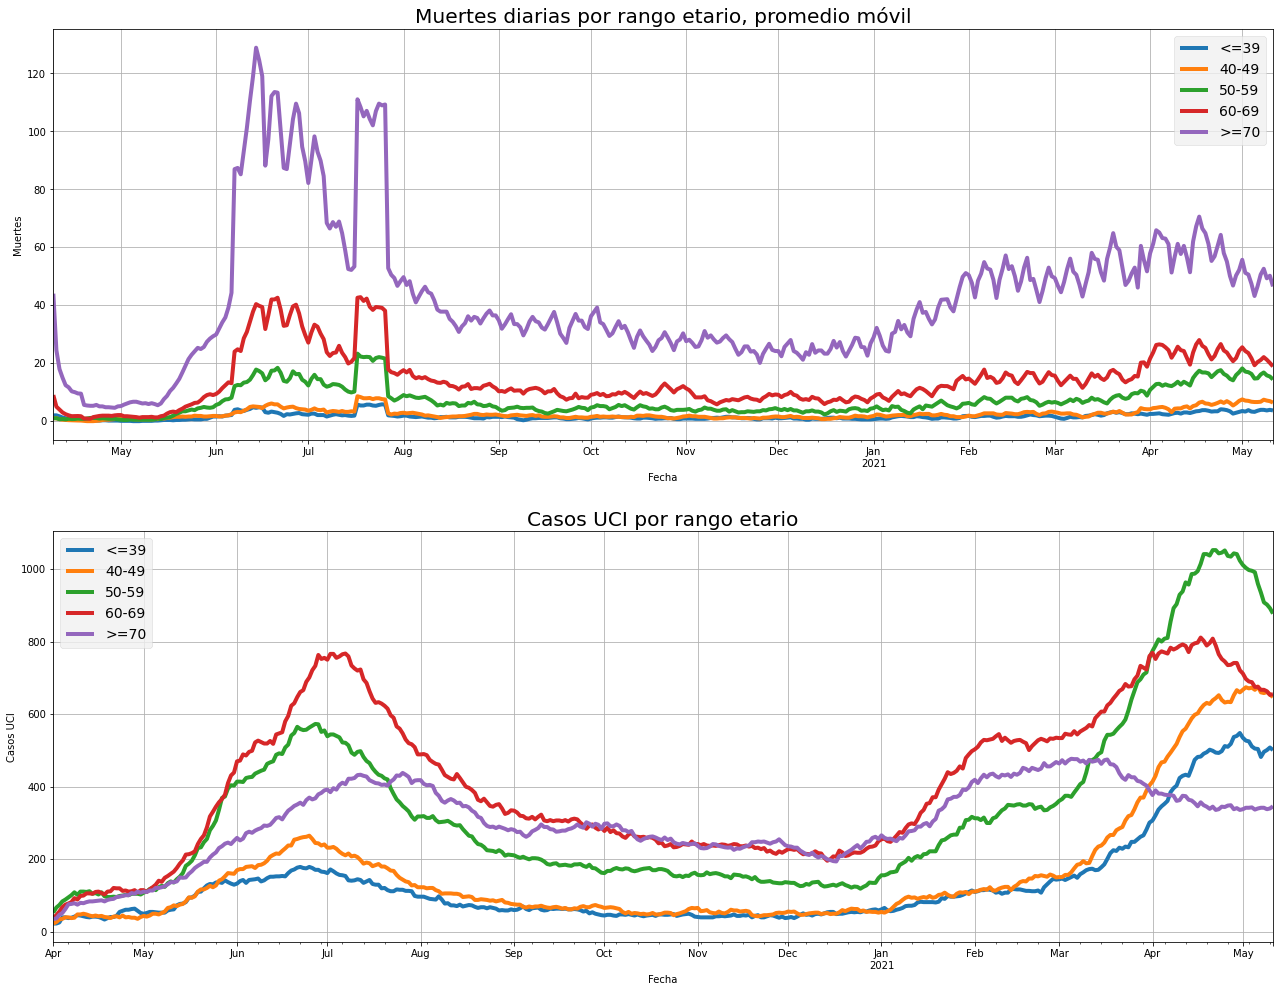

In [5]:
from matplotlib import pyplot as plt

grupos_de_edad = ('<=39', '40-49', '50-59', '60-69', '>=70')

fig, ax  = plt.subplots(2,1,figsize=(18,14))
plt.style.use('fivethirtyeight')

for grupo_edad in grupos_de_edad:
    Indices = data_muertes['Grupo de edad'] == grupo_edad 
    filtro_edad = data_muertes[Indices]
    Muertes_totales = filtro_edad['Casos confirmados por dia']

    Indices = data_UCI['Grupo de edad'] == grupo_edad 
    filtro_edad = data_UCI[Indices]
    UCI_totales = filtro_edad['Casos confirmados']

    
    Tamano_ventana = 10    # Ventana de 10 días

    # Calculamos promedio móvil con .rolling() y .mean()
    # min_periods = 1 permite que calcule el promedio para ventanas más pequeñas como al inicio y al final.
    Muertes_movil = Muertes_totales.rolling(window = Tamano_ventana, min_periods = 1).mean()

    Muertes_movil.plot(ax = ax[0],label = grupo_edad)
    UCI_totales.plot(ax = ax[1],label = grupo_edad)


ax[0].set_title("Muertes diarias por rango etario, promedio móvil")
ax[0].set_ylabel('Muertes')
ax[0].set_xlabel('Fecha')

#Graficamos la comparación
ax[1].set_title("Casos UCI por rango etario")
ax[1].set_ylabel('Casos UCI')
ax[1].set_xlabel('Fecha')


ax[0].legend()
ax[1].legend()
fig.tight_layout(h_pad = 2)
fig.show()


El peak de casos UCI del año 2020, a diferencia del peak actual, coincidió con el peak de muertes, lo que puede deberse a que el COVID-19 era una enfermedad nueva y poco conocida, por lo que los cuidados no estaban muy claros y había mucha incertidumbre acerca de la enfermedad. En cuanto al peak actual, se puede identificar que el grupo etario con menos casos UCI es el de adultos sobre los 70 años de edad, lo  que se puede atribuir al efecto de la vacunación, debido a que gran parte de las personas de este grupo etario ya se encuentran inoculadas con las dos dosis, lo anterior también influye en la cantidad de muertes diarias, ya que mediante el gráfico se puede apreciar que no ha existido un aumento significativo en este número

El peak de casos UCI

## Problema 2 (2 puntos)

Calcule los indicadores estadísticos de promedio, mediana, primer y tercer cuartil de las muertes y uso de UCI, de los 5 tramos de edades. Para ello, grafique los valores obtenidos en un diagrama de caja y bigote, también conocido como *boxplot*.

*Hint: busque qué funciones de Pandas calculan lo pedido en forma automática*

*Hint 2: Añada límites para los valores de eje y tanto para casos UCI como para muertes para que los gráficos boxplot se puedan comparar. Para lo anterior, utilice el atributo "set_ylim([limite_inferior,limite_superior]) de los gráficos de pyplot.*

En base a los estadísticos:

* Compare los estadísticos de casos UCI y muertes ¿Qué diferencias existen? ¿Qué tipo causas se le podrían atribuir?











ipykernel_launcher:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


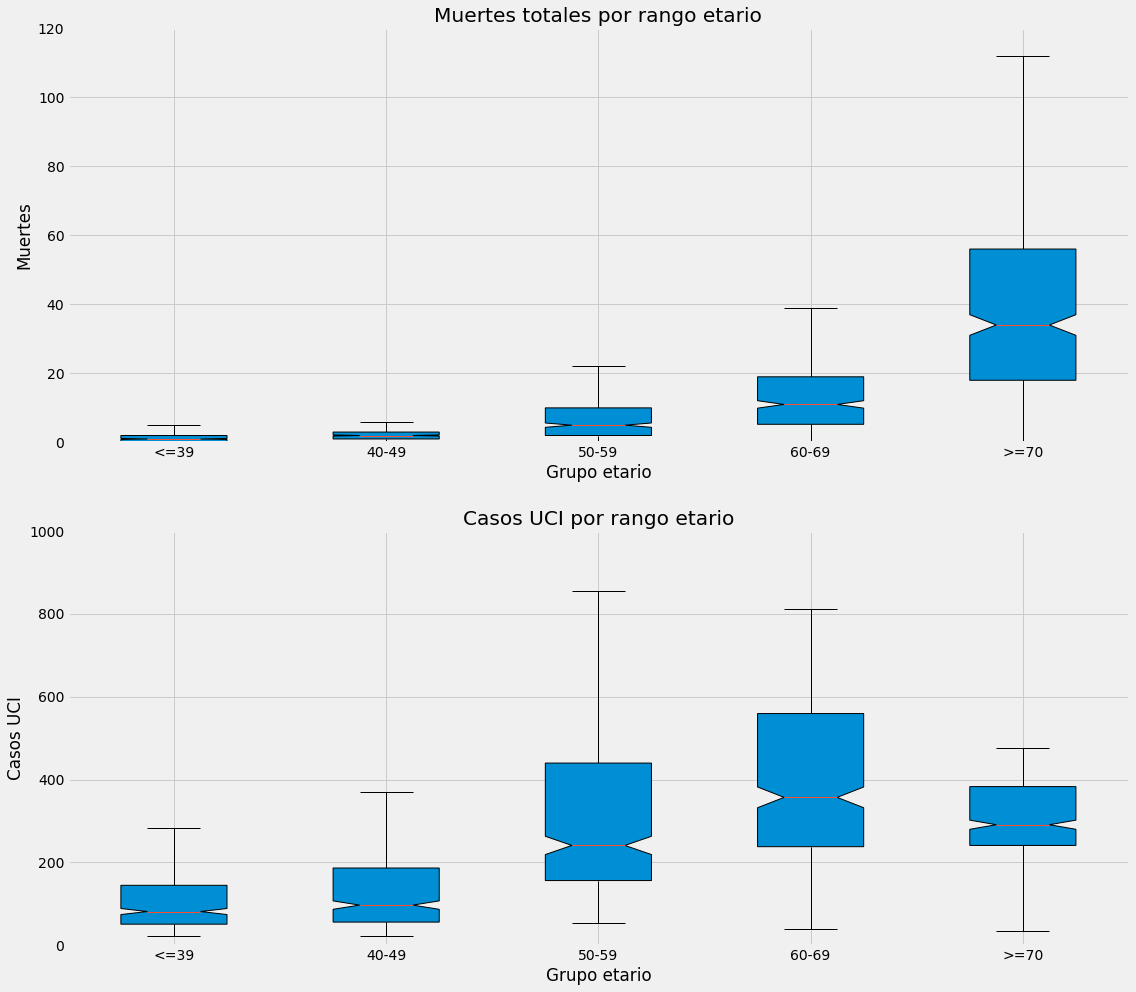

In [6]:
from matplotlib import pyplot as plt 
import numpy as np

grupos_de_edad = ('<=39', '40-49', '50-59', '60-69', '>=70')
indices = np.arange(len(grupos_de_edad))

fig, ax  = plt.subplots(2,1,figsize=(16,14))
# plt.style.use('fivethirtyeight')

promedios_muertes = []
mediana_muertes = []
primer_cuartil_muertes = []
tercer_cuartil_muertes = []

promedios_UCI = []
mediana_UCI = []
primer_cuartil_UCI = []
tercer_cuartil_UCI = []

datas =[]
datas2 = []

for grupo_edad in grupos_de_edad:
    Indices = data_muertes['Grupo de edad'] == grupo_edad 
    filtro_edad = data_muertes[Indices]
    Muertes_totales = filtro_edad['Casos confirmados por dia']

    Indices = data_UCI['Grupo de edad'] == grupo_edad 
    filtro_edad = data_UCI[Indices]
    UCI_totales = filtro_edad['Casos confirmados']

    promedios_muertes.append(Muertes_totales.mean())
    mediana_muertes.append(np.median(Muertes_totales))
    primer_cuartil_muertes.append(np.percentile(Muertes_totales, 25))
    tercer_cuartil_muertes.append(np.percentile(Muertes_totales, 75))

    promedios_UCI.append(UCI_totales.mean())
    mediana_UCI.append(np.median(UCI_totales))
    primer_cuartil_UCI.append(np.percentile(UCI_totales, 25))
    tercer_cuartil_UCI.append(np.percentile(UCI_totales, 75))

    datas.append(Muertes_totales)
    datas2.append(UCI_totales)

  
ax[0].boxplot(datas, showfliers=False, patch_artist=True, notch=True, vert=True)
ax[0].set_title("Muertes totales por rango etario")
ax[0].set_ylabel('Muertes')
ax[0].set_xticklabels(labels = grupos_de_edad)
ax[0].set_xlabel("Grupo etario")

ax[0].set_ylim([0, 120])


ax[1].boxplot(datas2, showfliers=False, patch_artist=True, notch=True, vert=True)
ax[1].set_title("Casos UCI por rango etario")
ax[1].set_ylabel('Casos UCI')
ax[1].set_xticklabels(labels = grupos_de_edad)
ax[1].set_xlabel("Grupo etario")

ax[1].set_ylim([0, 1000])

fig.tight_layout(h_pad = 2)
fig.show()

Si comparamos ambos graficos, podemos notar que tienen una tendencia muy similar. A medida que aumenta el rango etario, el uso de camas UCI y de muertes aumenta. Por otro lado, al comparar dentro de un mismo grafico podemos notar que a mayor edad mayor serán los indicadores estadisticos. Esto se debe a que la gravedad del virus se incrementa a medida que aumenta la edad, por lo tanto, aumenta la letalidad y el uso de camas UCI en este grupo eatrio.

## Problema 3 (2 puntos)

Ajuste una recta al uso de UCI promedio de toda la pandemia por tramo de edad y las muertes promedio de toda la pandemia por tramo de edad. Para ello:

* Utilice el código entregado para transformar los valores de los tramos de tipo *string* a clases númericas (en el código 1, 2, 3, 4 y 5 para los 5 tramos. Por ejemplo, el tramo "<=39" ahora será 1). Para los siguientes pasos utilice en vez de la columna 'Grupo de edad' la columna **'Grupo de edad ordinal'**.

* Agrupe y promedie los datos de UCI y de muertes por grupo etario usando la función *groupby*, incluya el argumento '*as_index = False*' en *groupby* para que no asigne los grupos etarios como índice, ya que los usaremos para el ajuste lineal. Ejemplo de agrupación y promedio:


```
datos_agrupados_para_edad = data.groupby('Grupo de edad ordinal',as_index=False).mean()
```

* Con los datos agrupados y promediados asigne los valores de la columna de grupo etario a una variable 'x' y los de casos UCI o muertes a 'y'. Desde este punto utilice el código ejemplo de la tarea formativa.


Para evaluar el ajuste **evalue la correlación** entre los casos UCI y grupo etario, y muertes con grupo etario. Para ello utilice la función corr de una serie de datos de pandas de la siguiente manera



```
Serie1 = data['Columna1']
Serie2 = data['Columna2']
Correlacion = Serie1.corr(Serie2)
```

1. ¿Qué tipo de datos esta más correlacionado con el grupo etario?

2. ¿En qué grupos etarios la relación con muertes o casos UCI es más lineal?
¿En cuáles no?



Para quienes no conocen bien que significa la correlación, acá un poco de teoría.


El coeficiente de correlación de Pearson es un índice que puede utilizarse para medir el grado de relación de dos variables 

\begin{equation}
\rho_{X, Y}=\frac{\sigma_{X Y}}{\sigma_{X} \sigma_{Y}}=\frac{E\left[\left(X-\mu_{X}\right)\left(Y-\mu_{Y}\right)\right]}{\sigma_{X} \sigma_{Y}}
\end{equation}

El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

* Si $r = 1$, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.

* Si $0 < r < 1$, existe una correlación positiva.

* Si $r = 0$, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.

* Si $-1 < r < 0$, existe una correlación negativa.

* Si $r = -1$, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

ipykernel_launcher:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


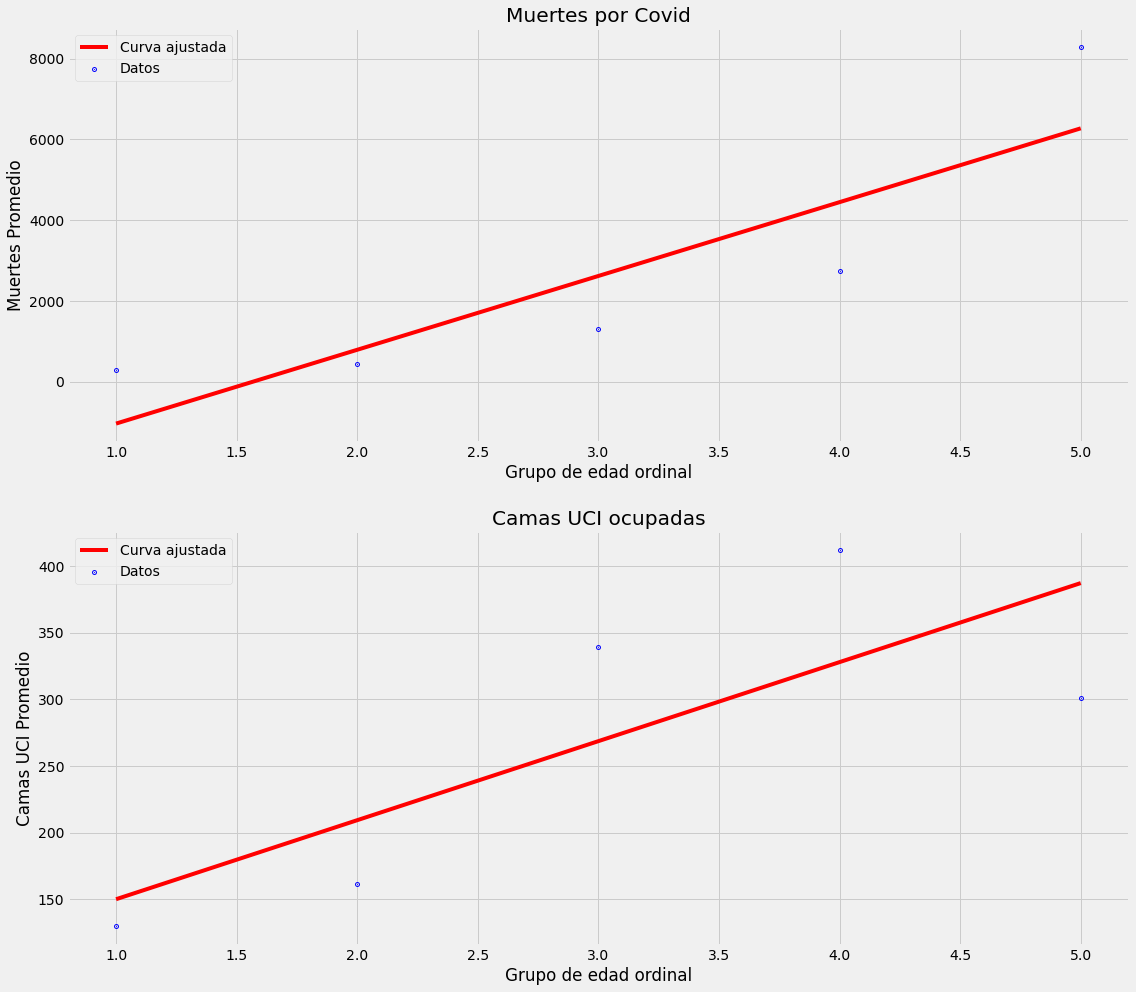

In [7]:
import numpy as np
from scipy.optimize import curve_fit

data_UCI.loc[data_UCI['Grupo de edad']=='<=39','Grupo de edad ordinal'] = 1  
data_UCI.loc[data_UCI['Grupo de edad']=='40-49','Grupo de edad ordinal'] = 2  
data_UCI.loc[data_UCI['Grupo de edad']=='50-59','Grupo de edad ordinal'] = 3
data_UCI.loc[data_UCI['Grupo de edad']=='60-69','Grupo de edad ordinal'] = 4
data_UCI.loc[data_UCI['Grupo de edad']=='>=70','Grupo de edad ordinal'] = 5 

data_muertes.loc[data_muertes['Grupo de edad']=='<=39','Grupo de edad ordinal'] = 1  
data_muertes.loc[data_muertes['Grupo de edad']=='40-49','Grupo de edad ordinal'] = 2  
data_muertes.loc[data_muertes['Grupo de edad']=='50-59','Grupo de edad ordinal'] = 3
data_muertes.loc[data_muertes['Grupo de edad']=='60-69','Grupo de edad ordinal'] = 4
data_muertes.loc[data_muertes['Grupo de edad']=='>=70','Grupo de edad ordinal'] = 5    
#lo de arriba venía

def fit_func(x, a, b):
    return a*x + b

fig, ax  = plt.subplots(2,1,figsize = (16, 14))

datos_agrupados_para_UCI = data_UCI.groupby('Grupo de edad ordinal',as_index=False).mean()
datos_agrupados_para_muertes = data_muertes.groupby('Grupo de edad ordinal',as_index=False).mean()

#no se si lo que llevo esta bien porque no me corre la funcion para hacer la recta :( y no puse la correlacion pq todavia no cacho dnde ponerla pero sigo intentando :)
x = datos_agrupados_para_muertes['Grupo de edad ordinal'].values
y = datos_agrupados_para_muertes['Casos confirmados'].values

params = curve_fit(fit_func, x, y)
[a, b] = params[0]
y_pred = fit_func(x,a,b)

ax[0].plot(x, y_pred, color = 'r', label = 'Curva ajustada')   
ax[0].scatter(x, y,color = 'b', linewidth = 4, s=1, label = 'Datos') 
ax[0].legend()
ax[0].set_title('Muertes por Covid')
ax[0].set_xlabel('Grupo de edad ordinal')
ax[0].set_ylabel('Muertes Promedio')

x = datos_agrupados_para_UCI['Grupo de edad ordinal'].values
y = datos_agrupados_para_UCI['Casos confirmados'].values


params = curve_fit(fit_func, x, y)
[a, b] = params[0]
y_pred = fit_func(x,a,b)

ax[1].plot(x, y_pred,color = 'r',label = 'Curva ajustada')   
ax[1].scatter(x, y,color = 'b', linewidth = 4, s=1, label = 'Datos') 
ax[1].legend()
ax[1].set_title('Camas UCI ocupadas')
ax[1].set_xlabel('Grupo de edad ordinal')
ax[1].set_ylabel('Camas UCI Promedio')

fig.tight_layout(h_pad = 2)
fig.show()

In [8]:
serie1 = datos_agrupados_para_UCI['Grupo de edad ordinal']
serie2 = datos_agrupados_para_UCI['Casos confirmados']
co = serie1.corr(serie2)
print(co)

0.7822282198706757


In [9]:
Serie1 = datos_agrupados_para_muertes['Grupo de edad ordinal']
Serie2 = datos_agrupados_para_muertes['Casos confirmados']
co1 = Serie1.corr(Serie2)
print(co1)

0.8714602216609503


En base a los calculos hechos, se puede decir que tanto los datos de muertes por COVID como los datos de usos de camas UCI están correlacionados con el grupo etario, lo anterior se puede deducir a partir de los valores para los coeficientes de correlación obtenidos, ambos relativamente cercanos a 1. Además, se puede concluir que el número de muertes está más correlacionado con el grupo etario, ya que su valor aociado es de 0.87131, el cual es más cercano a 1 que el valor de la correlación de camas UCI usadas con el grupo etario, el que corresponde a 0.8241. Por último, ambos casos corresponde a una correlación positiva ya que ambos valores de la correlación se encuentra entre 0 y 1.

En cuanto a la linealidad de los distintos rangos etarios, se puede ver en el grafico de muertes por covid que el grupo etarió más lineal es el 2, el cual corresponde a 40-49 años. En el caso del grafico de camas UCI ocupadas, el grupo etario qmás lineal corresponde al 1, es decir, a menores o iguales a 39 años. Estas estimaciónes se realizan en base a la cercanía de los datos a la recta de ajuste lineal.

# Consideraciones generales

Para la entrega de su tarea tengan en cuenta las siguientes consideraciones:



1. La entrega de la tarea se realiza por medio del buzón de tareas de Canvas. Deben cargar un archivo por pareja en el formato **Pareja_X_TareaSumativa1.ipynb** con **X** el número de la pareja. Quienes no respeten el formato tendrán un descuento de 5 décimas en la nota final.  

2. En la revisión se consideran descuentos por falta de ortografías o por falta de fuentes de información cuando utilicen datos no incluidos en las tareas o las clases. Con un link basta para citar.

3. El plazo de entrega es hasta el **jueves 22 de abril** a las **23:59 hrs**. Se considerarán descuentos de 0.5 puntos por cada hora o fracción de atraso en la entrega, sin excepciones. 